Data Mining Project
Noah Langenheim s1087405
Diun Tang 
January 2023

**Software**

The following libraries will be used throughout this project. We will explpain our choice once they are used

In [17]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm, preprocessing, decomposition
from sklearn.preprocessing import normalize
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd


**Training data for subject 1**

Our dataset is splitted into 3 subjects. For each subject we have 3 files for training the classifier. Then again for each dataset we are given another file that contains data with which we can test the classifier. All files are .mat files, and hence they can be easily loaded by using the loadmat() function of scipy.io. 
Below we loaded the training data for the first subject. 

In [18]:

subject1_train1 = sio.loadmat("train_subject1_psd01.mat")
subject1_train2 = sio.loadmat("train_subject1_psd02.mat")
subject1_train3 = sio.loadmat("train_subject1_psd03.mat")

**Structure of the Training Data**

Each training file has the same structure. It is basically a dictionary, consisting of some general information, such has the header or the version, as well as all of the EEG values that were recorded in a session, which are stored under the key 'X' and a corresponding label for every exercise that was done, which are stored under the key 'Y'. 

In [19]:
print(subject1_train1.keys())
print(subject1_train1['__header__'])

dict_keys(['__header__', '__version__', '__globals__', 'nfo', 'Y', 'X'])
b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Mon Feb 28 12:15:02 2005'


We then proceeded to transform the data into a numpy array, such that we can work with it. 
We stored the correpsonding label of each record in another Array Y. 

In [20]:
X1 = np.array(subject1_train1['X'])
Y1 = np.array(subject1_train1['Y'])

X2 = np.array(subject1_train2['X'])
Y2 = np.array(subject1_train2['Y'])

X3 = np.array(subject1_train3['X'])
Y3 = np.array(subject1_train3['Y'])

subject1_X_train = np.concatenate((X1,X2,X3), axis = 0)
subject1_y_train = np.concatenate((Y1,Y2,Y3), axis = 0)
subject1_X_train_normalized = normalize(subject1_X_train)


In [21]:
left_size = np.count_nonzero(Y1 == 2) + np.count_nonzero(Y2 == 2) + np.count_nonzero(Y3 == 2)
right_size = np.count_nonzero(Y1 == 3) + np.count_nonzero(Y2 == 3) + np.count_nonzero(Y3 == 3) 
word_size = np.count_nonzero(Y1 == 7) + np.count_nonzero(Y2 == 7) + np.count_nonzero(Y3 == 7)
total_Y_size  = Y1.size + Y2.size + Y3.size

print("Total amount of exercises done by subject 1: ", total_Y_size )
print("number of times that exercises 'left' was done: ", left_size)
print("number of times that exercise 'right' was done: ", right_size)
print("number of times that exercise 'word' was done: ", word_size ) 

Total amount of exercises done by subject 1:  10528
number of times that exercises 'left' was done:  2928
number of times that exercise 'right' was done:  3456
number of times that exercise 'word' was done:  4144


In [22]:
print(np.shape(X1))
print(np.shape(X2))
print(np.shape(X3))

(3488, 96)
(3472, 96)
(3568, 96)


Each row in the data set is a sample with 96 attributes. The data is separated into different parietal channels. The EEG has recorded all the samples into clusters of 8 centro parietal channels. Each cluster contains data of 12 components in the band of 8-30 kHz with 2 kHz increments. 

**Test Data for subject 1** 

In [23]:
subject1_test = sio.loadmat("test_subject1_psd04.mat")
print(subject1_test.keys())
subject1_X_test = np.array(subject1_test['X'])
subject1_X_test_normalized = normalize(subject1_X_test)

df = pd.read_excel("./TestLabels-Subject1.xlsx", header = None)
subject1_y_test = np.array(df)


dict_keys(['__header__', '__version__', '__globals__', 'nfo', 'X'])


**Data for subject 2** 

We load and process the test and training data in the same way that we did it for subject 1 

In [24]:
subject2_train1 = sio.loadmat("train_subject2_psd01.mat")
subject2_train2 = sio.loadmat("train_subject2_psd02.mat")
subject2_train3 = sio.loadmat("train_subject2_psd03.mat")
subject2_test = sio.loadmat("test_subject2_psd04.mat")
df_subj2 = pd.read_excel("./TestLabels-Subject2.xlsx", header = None)



subject2_X1 = np.array(subject2_train1['X'])
subject2_Y1 = np.array(subject2_train1['Y'])
subject2_X2 = np.array(subject2_train2['X'])
subject2_Y2 = np.array(subject2_train2['Y'])
subject2_X3 = np.array(subject2_train3['X'])
subject2_Y3 = np.array(subject2_train3['Y'])


subject2_X_train = np.concatenate((subject2_X1, subject2_X2, subject2_X3), axis = 0)
subject2_X_train_normalized = normalize(subject2_X_train)
subject2_y_train = np.concatenate((subject2_Y1,subject2_Y2, subject2_Y3), axis = 0)
subject2_X_test = np.array(subject2_test['X'])
subject2_X_test_normalized = normalize(subject2_X_test)
subject2_y_test = np.array(df_subj2)






**Data for subject3**

In [25]:
subject3_train1 = sio.loadmat("train_subject3_psd01.mat")
subject3_train2 = sio.loadmat("train_subject3_psd02.mat")
subject3_train3 = sio.loadmat("train_subject3_psd03.mat")
subject3_test = sio.loadmat("test_subject3_psd04.mat")
df_subj3 = pd.read_excel("./TestLabels-Subject3.xlsx", header = None)

subject3_X1 = np.array(subject3_train1['X'])
subject3_Y1 = np.array(subject3_train1['Y'])
subject3_X2 = np.array(subject3_train2['X'])
subject3_Y2 = np.array(subject3_train2['Y'])
subject3_X3 = np.array(subject3_train3['X'])
subject3_Y3 = np.array(subject3_train3['Y'])

subject3_X_train = np.concatenate((subject3_X1, subject3_X2, subject3_X3), axis = 0)
subject3_X_train_normalized = normalize(subject3_X_train) 
subject3_y_train = np.concatenate((subject3_Y1,subject3_Y2, subject3_Y3), axis = 0)
subject3_X_test = np.array(subject3_test['X'])
subject3_X_test_normalized = normalize(subject3_X_test)
subject3_y_test = np.array(df_subj3)

**Imbalance of Test data**

In [26]:
print("Labels of test data for subject 1: ")
print("left: ", np.count_nonzero(subject1_y_test == 2))
print("right: ", np.count_nonzero(subject1_y_test == 3))
print("words: ", np.count_nonzero(subject1_y_test == 7))
print("Labels of test data for subject 2: ")
print("left: ", np.count_nonzero(subject2_y_test == 2))
print("right: ", np.count_nonzero(subject2_y_test == 3))
print("words: ", np.count_nonzero(subject2_y_test == 7))
print("Labels of test data for subject 3: ")
print("left: ", np.count_nonzero(subject3_y_test == 2))
print("right: ", np.count_nonzero(subject3_y_test == 3))
print("words: ", np.count_nonzero(subject3_y_test == 7))

Labels of test data for subject 1: 
left:  1040
right:  1024
words:  1440
Labels of test data for subject 2: 
left:  864
right:  1152
words:  1456
Labels of test data for subject 3: 
left:  1200
right:  1168
words:  1120


**Support Vector machine**

SUBJECT 1
              precision    recall  f1-score   support

           2       0.73      0.77      0.75      1040
           3       0.69      0.70      0.69      1024
           7       0.80      0.77      0.79      1440

    accuracy                           0.75      3504
   macro avg       0.74      0.75      0.74      3504
weighted avg       0.75      0.75      0.75      3504

Balanced accuracy score:   0.7454994658119659


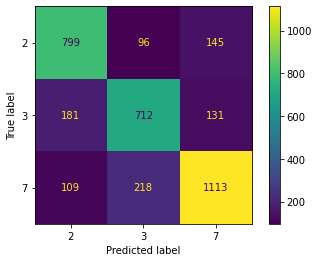

              precision    recall  f1-score   support

           2       0.74      0.78      0.76      1040
           3       0.65      0.67      0.66      1024
           7       0.80      0.76      0.78      1440

    accuracy                           0.74      3504
   macro avg       0.73      0.74      0.73      3504
weighted avg       0.74      0.74      0.74      3504

Balanced accuracy score:   0.7359347177706552


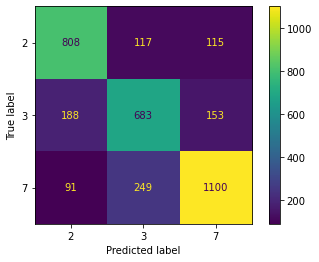

SUBJECT 2
              precision    recall  f1-score   support

           2       0.50      0.44      0.47       864
           3       0.63      0.69      0.65      1152
           7       0.69      0.69      0.69      1456

    accuracy                           0.63      3472
   macro avg       0.61      0.60      0.60      3472
weighted avg       0.62      0.63      0.62      3472

Balanced accuracy score:   0.6048534798534798


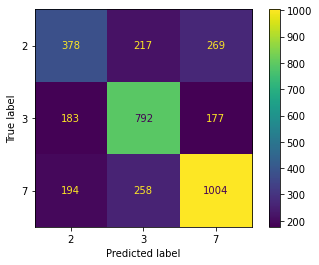

              precision    recall  f1-score   support

           2       0.50      0.42      0.46       864
           3       0.62      0.62      0.62      1152
           7       0.65      0.71      0.68      1456

    accuracy                           0.61      3472
   macro avg       0.59      0.59      0.59      3472
weighted avg       0.60      0.61      0.61      3472

Balanced accuracy score:   0.5855347391805726


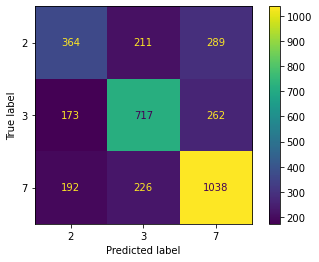

SUBJECT 3
              precision    recall  f1-score   support

           2       0.48      0.28      0.35      1200
           3       0.49      0.59      0.53      1168
           7       0.58      0.72      0.64      1120

    accuracy                           0.52      3488
   macro avg       0.52      0.53      0.51      3488
weighted avg       0.52      0.52      0.51      3488

Balanced accuracy score:   0.528085453359426


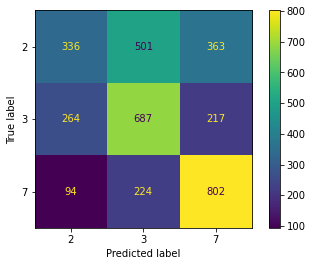

              precision    recall  f1-score   support

           2       0.46      0.31      0.37      1200
           3       0.47      0.52      0.49      1168
           7       0.56      0.68      0.62      1120

    accuracy                           0.50      3488
   macro avg       0.50      0.51      0.49      3488
weighted avg       0.50      0.50      0.49      3488

Balanced accuracy score:   0.5073681778647532


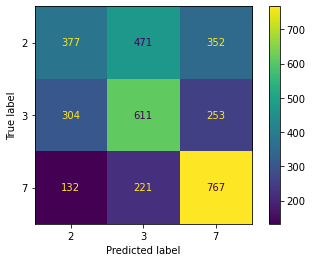

In [27]:
def SVM_on_subject (X_train, X_test, y_train, y_test):
    C = 1 
    clf = svm.LinearSVC(C = C)
    clf.fit(X_train, y_train.ravel()) 

    prediction = clf.predict(X_test)
    print(classification_report(y_test, prediction))
    print("Balanced accuracy score:  ",balanced_accuracy_score(y_test, prediction))
    conf_matrix = confusion_matrix(y_test, prediction)
    ConfusionMatrixDisplay(conf_matrix, display_labels=[2,3,7]).plot()
    plt.show()

print('SUBJECT 1')
SVM_on_subject(subject1_X_train, subject1_X_test, subject1_y_train, subject1_y_test)
SVM_on_subject(subject1_X_train_normalized, subject1_X_test_normalized, subject1_y_train, subject1_y_test)
print('SUBJECT 2')
SVM_on_subject(subject2_X_train, subject2_X_test, subject2_y_train, subject2_y_test)
SVM_on_subject(subject2_X_train_normalized, subject2_X_test_normalized, subject2_y_train, subject2_y_test)
print('SUBJECT 3')
SVM_on_subject(subject3_X_train, subject3_X_test, subject3_y_train, subject3_y_test)
SVM_on_subject(subject3_X_train_normalized, subject3_X_test_normalized, subject3_y_train, subject3_y_test)


**K-Nearest Neighbours**

Another classification method that's suitable for this problem is K-Nearest Neighbours. In contrast to many other methods, linear SVM included, is this classification method non-linear. We expect a big difference in precision scores with this choice compared to the other linear methods. We would like to try different ways to attack this problem.


SUBJECT 1
              precision    recall  f1-score   support

           2       0.65      0.73      0.69      1040
           3       0.57      0.58      0.57      1024
           7       0.76      0.70      0.73      1440

    accuracy                           0.67      3504
   macro avg       0.66      0.67      0.66      3504
weighted avg       0.67      0.67      0.67      3504

Balanced accuracy score:   0.6666783520299145


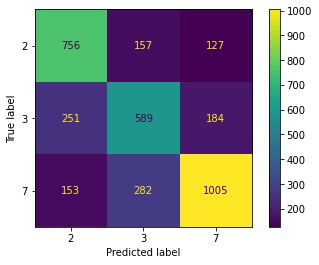

SUBJECT 2
              precision    recall  f1-score   support

           2       0.40      0.42      0.41       864
           3       0.54      0.54      0.54      1152
           7       0.62      0.61      0.62      1456

    accuracy                           0.54      3472
   macro avg       0.52      0.52      0.52      3472
weighted avg       0.54      0.54      0.54      3472

Balanced accuracy score:   0.5211979378646046


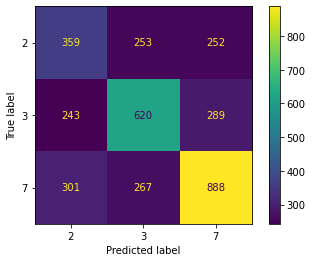

SUBJECT 3
              precision    recall  f1-score   support

           2       0.41      0.44      0.42      1200
           3       0.41      0.44      0.42      1168
           7       0.53      0.44      0.48      1120

    accuracy                           0.44      3488
   macro avg       0.45      0.44      0.44      3488
weighted avg       0.45      0.44      0.44      3488

Balanced accuracy score:   0.4403326810176125


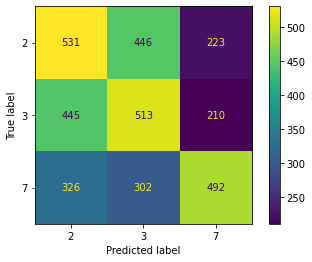

In [28]:
def KNN_on_subject (X_train, X_test, y_train, y_test):
    clf = KNeighborsClassifier(metric='euclidean')
    clf.fit(X_train, y_train.ravel())
    prediction = clf.predict(X_test)
    
    print(classification_report(y_test, prediction))
    print("Balanced accuracy score:  ",balanced_accuracy_score(y_test, prediction))
    conf_matrix = confusion_matrix(y_test, prediction)
    ConfusionMatrixDisplay(conf_matrix, display_labels=[2,3,7]).plot()
    plt.show()

print('SUBJECT 1')
KNN_on_subject(subject1_X_train, subject1_X_test, subject1_y_train, subject1_y_test)
print('SUBJECT 2')
KNN_on_subject(subject2_X_train, subject2_X_test, subject2_y_train, subject2_y_test)
print('SUBJECT 3')
KNN_on_subject(subject3_X_train, subject3_X_test, subject3_y_train, subject3_y_test)


**Naive Bayes Classifier**


SUBJECT 1
              precision    recall  f1-score   support

           2       0.59      0.91      0.71      1040
           3       0.74      0.27      0.40      1024
           7       0.76      0.80      0.78      1440

    accuracy                           0.68      3504
   macro avg       0.70      0.66      0.63      3504
weighted avg       0.70      0.68      0.65      3504

Balanced accuracy score:   0.6602675391737892


c:\Users\28815\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


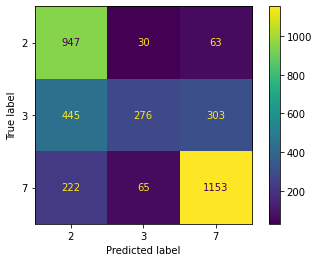

SUBJECT 2
              precision    recall  f1-score   support

           2       0.37      0.36      0.36       864
           3       0.59      0.51      0.55      1152
           7       0.63      0.72      0.68      1456

    accuracy                           0.56      3472
   macro avg       0.53      0.53      0.53      3472
weighted avg       0.56      0.56      0.55      3472

Balanced accuracy score:   0.5283734398317731


c:\Users\28815\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


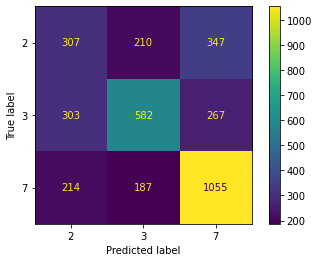

SUBJECT 3
              precision    recall  f1-score   support

           2       0.42      0.24      0.31      1200
           3       0.38      0.46      0.42      1168
           7       0.44      0.53      0.48      1120

    accuracy                           0.41      3488
   macro avg       0.41      0.41      0.40      3488
weighted avg       0.41      0.41      0.40      3488

Balanced accuracy score:   0.41200641443792135


c:\Users\28815\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


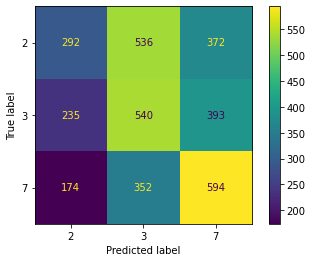

In [29]:
def GNB_on_subject (X_train, X_test, y_train, y_test):
      gnb = GaussianNB()
      prediction = gnb.fit(X_train, y_train).predict(X_test)
      print(classification_report(y_test, prediction))
      print("Balanced accuracy score:  ",balanced_accuracy_score(y_test, prediction))
      conf_matrix = confusion_matrix(y_test, prediction)
      ConfusionMatrixDisplay(conf_matrix, display_labels=[2,3,7]).plot()
      plt.show()

print('SUBJECT 1')
GNB_on_subject(subject1_X_train, subject1_X_test, subject1_y_train, subject1_y_test)
print('SUBJECT 2')
GNB_on_subject(subject2_X_train, subject2_X_test, subject2_y_train, subject2_y_test)
print('SUBJECT 3')
GNB_on_subject(subject3_X_train, subject3_X_test, subject3_y_train, subject3_y_test)


**Plotting Data (just for practice, maybe rename and move later)**

In [30]:
# def make_PCA_plot(X, y):
#     mu = X.mean()
#     Y = np.array(X-mu)
#     u, s, vh = np.linalg.svd(Y)
#     Z = np.dot(Y, vh.transpose())

#     y = y.ravel()
#     fig3d = plt.figure()
#     ax1 = Axes3D(fig3d)
#     ax1.scatter([Z[y[:]==2, 0]], [Z[y[:]==2, 1]], [Z[y[:]==2, 2]], label = "Class 2")
#     ax1.scatter([Z[y[:]==3, 0]], [Z[y[:]==3, 1]],[Z[y[:]==3, 2]], label = "Class 3")
#     ax1.scatter([Z[y[:]==7, 0]], [Z[y[:]==7, 1]],[Z[y[:]==7, 2]], label = "Class 7")

#     ax1.legend()
#     ax1.set_xlabel("PC1")
#     ax1.set_ylabel("PC2")
#     ax1.set_zlabel("PC3")
#     ax1.set_title("3-dimensional scatter plot of the profjections on the first three PCs")
#     plt.show()

# print('SUBJECT 1')
# make_PCA_plot(subject1_X_train, subject1_y_train)
# print('SUBJECT 2')
# make_PCA_plot(subject2_X_train, subject2_y_train)
# print('SUBJECT 3')
# make_PCA_plot(subject3_X_train, subject3_y_train)



**SVM with preprocessed Data** 

              precision    recall  f1-score   support

           2       0.73      0.77      0.75      1040
           3       0.70      0.69      0.70      1024
           7       0.79      0.77      0.78      1440

    accuracy                           0.75      3504
   macro avg       0.74      0.74      0.74      3504
weighted avg       0.75      0.75      0.75      3504

Balanced accuracy score:   0.7430477653133902


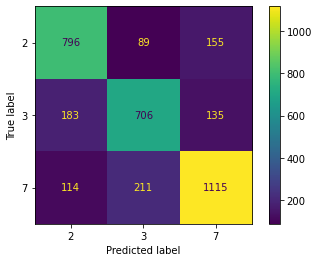

              precision    recall  f1-score   support

           2       0.51      0.43      0.46       864
           3       0.62      0.69      0.65      1152
           7       0.69      0.69      0.69      1456

    accuracy                           0.62      3472
   macro avg       0.60      0.60      0.60      3472
weighted avg       0.62      0.62      0.62      3472

Balanced accuracy score:   0.6010685880477548


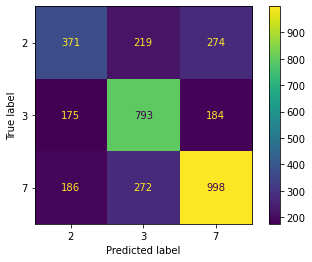

              precision    recall  f1-score   support

           2       0.47      0.26      0.33      1200
           3       0.48      0.61      0.53      1168
           7       0.58      0.70      0.63      1120

    accuracy                           0.52      3488
   macro avg       0.51      0.52      0.50      3488
weighted avg       0.51      0.52      0.50      3488

Balanced accuracy score:   0.5205895303326811


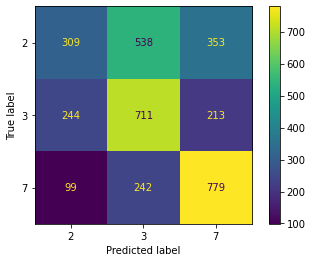

In [31]:
selector = SelectKBest(mutual_info_classif, k=60)
mutualinfo_subject1_X_train = selector.fit_transform(subject1_X_train, subject1_y_train.ravel())
mutualinfo_subject1_X_test = selector.transform(subject1_X_test)
mutualinfo_subject2_X_train = selector.fit_transform(subject2_X_train, subject2_y_train.ravel()) 
mutualinfo_subject2_X_test = selector.transform(subject2_X_test)
mutualinfo_subject3_X_train = selector.fit_transform(subject3_X_train, subject3_y_train.ravel()) 
mutualinfo_subject3_X_test = selector.transform(subject3_X_test)

SVM_on_subject(mutualinfo_subject1_X_train, mutualinfo_subject1_X_test, subject1_y_train, subject1_y_test)
SVM_on_subject(mutualinfo_subject2_X_train, mutualinfo_subject2_X_test, subject2_y_train, subject2_y_test)
SVM_on_subject(mutualinfo_subject3_X_train, mutualinfo_subject3_X_test, subject3_y_train, subject3_y_test)



**SVM with preprocessed and Normalized:**

In [32]:
#This is not entirely working yet. Hence the following code is still commented out.

# print("Hypertuning mutual_info_classification: Finding best value for K for SUBJECT 1")


# k_values = range(1, subject1_X_train.shape[1] + 1 )
# mutualinfo_best_k_subject1 = 0
# best_score = 0 

# for k in k_values:
#     selector = SelectKBest(mutual_info_classif, k=k) 
#     mutualinfo_normalized_subject1_X_train = selector.fit_transform(subject1_X_train_normalized, subject1_y_train.ravel())
#     mutualinfo_normalized_subject1_X_test = selector.transform(subject1_X_test_normalized)

#     clf = svm.LinearSVC()
#     clf.fit(mutualinfo_normalized_subject1_X_train, subject1_y_train.ravel())
#     y_pred = clf.predict(mutualinfo_normalized_subject1_X_test)
#     score = balanced_accuracy_score(y_pred, subject1_y_test)
#     if score > mutualinfo_best_k_subject1 : 
#         mutualinfo_best_k_subject1 = k
#         best_score = score

# print("Best k = {}, accuracy = {}".format(mutualinfo_best_k_subject1, best_score))




    







Hypertuning mutual_info_classification: Finding best value for K for SUBJECT 1


              precision    recall  f1-score   support

           2       0.75      0.80      0.77      1040
           3       0.69      0.70      0.69      1024
           7       0.82      0.77      0.79      1440

    accuracy                           0.76      3504
   macro avg       0.75      0.75      0.75      3504
weighted avg       0.76      0.76      0.76      3504

Balanced accuracy score:   0.7549006187678063


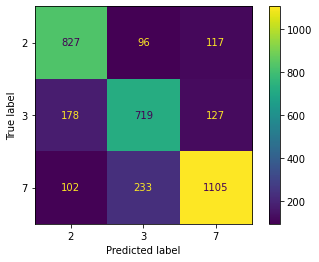

              precision    recall  f1-score   support

           2       0.51      0.44      0.47       864
           3       0.61      0.64      0.62      1152
           7       0.66      0.69      0.68      1456

    accuracy                           0.61      3472
   macro avg       0.59      0.59      0.59      3472
weighted avg       0.61      0.61      0.61      3472

Balanced accuracy score:   0.5910483228191562


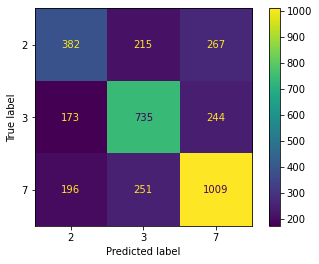

              precision    recall  f1-score   support

           2       0.45      0.29      0.36      1200
           3       0.48      0.55      0.51      1168
           7       0.55      0.68      0.61      1120

    accuracy                           0.50      3488
   macro avg       0.49      0.51      0.49      3488
weighted avg       0.49      0.50      0.49      3488

Balanced accuracy score:   0.5059969558599696


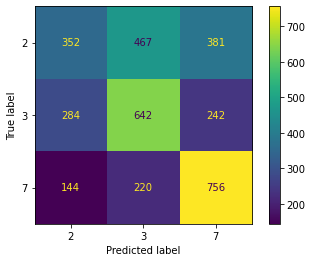

In [33]:



mutualinfo_normalized_subject1_X_train = selector.fit_transform(subject1_X_train_normalized, subject1_y_train.ravel())
mutualinfo_normalized_subject1_X_test = selector.transform(subject1_X_test_normalized)
mutualinfo_normalized_subject2_X_train = selector.fit_transform(subject2_X_train_normalized, subject2_y_train.ravel()) 
mutualinfo_normalized_subject2_X_test = selector.transform(subject2_X_test_normalized)
mutualinfo_normalized_subject3_X_train = selector.fit_transform(subject3_X_train_normalized, subject3_y_train.ravel()) 
mutualinfo_normalized_subject3_X_test = selector.transform(subject3_X_test_normalized)

SVM_on_subject(mutualinfo_normalized_subject1_X_train, mutualinfo_normalized_subject1_X_test, subject1_y_train, subject1_y_test)
SVM_on_subject(mutualinfo_normalized_subject2_X_train, mutualinfo_normalized_subject2_X_test, subject2_y_train, subject2_y_test)
SVM_on_subject(mutualinfo_normalized_subject3_X_train, mutualinfo_normalized_subject3_X_test, subject3_y_train, subject3_y_test)



**Classification with PCA as a preprocessing method**

Here we've tried to use PCA as a preprocessing method but the results for every algorithm is worse than without using PCA as preprocessing. Thus we didn't include this part in the report.

SUBJECT 1
              precision    recall  f1-score   support

           2       0.43      0.50      0.46      1040
           3       0.61      0.50      0.55      1024
           7       0.61      0.61      0.61      1440

    accuracy                           0.54      3504
   macro avg       0.55      0.54      0.54      3504
weighted avg       0.55      0.54      0.55      3504

Balanced accuracy score:   0.5358340010683761


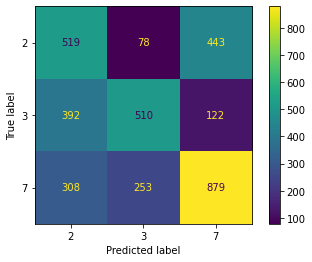

              precision    recall  f1-score   support

           2       0.52      0.63      0.57      1040
           3       0.52      0.53      0.52      1024
           7       0.70      0.58      0.64      1440

    accuracy                           0.58      3504
   macro avg       0.58      0.58      0.58      3504
weighted avg       0.59      0.58      0.58      3504

Balanced accuracy score:   0.5816033431267806


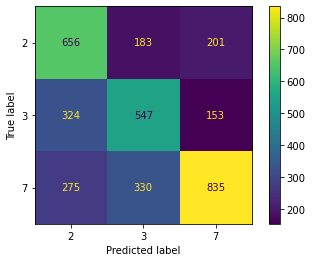

c:\Users\28815\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           2       0.47      0.64      0.54      1040
           3       0.57      0.57      0.57      1024
           7       0.63      0.47      0.54      1440

    accuracy                           0.55      3504
   macro avg       0.56      0.56      0.55      3504
weighted avg       0.57      0.55      0.55      3504

Balanced accuracy score:   0.558429598468661


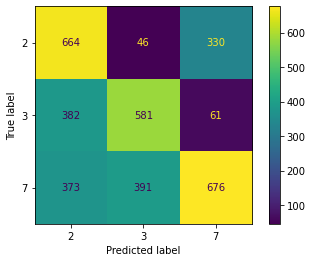

SUBJECT 2
              precision    recall  f1-score   support

           2       0.50      0.59      0.55       864
           3       0.56      0.62      0.59      1152
           7       0.70      0.56      0.63      1456

    accuracy                           0.59      3472
   macro avg       0.59      0.59      0.59      3472
weighted avg       0.60      0.59      0.59      3472

Balanced accuracy score:   0.5925682149640483


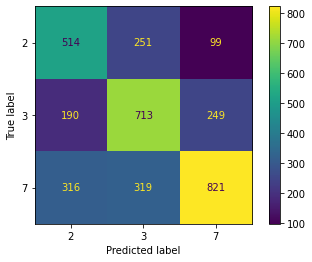

              precision    recall  f1-score   support

           2       0.42      0.59      0.49       864
           3       0.48      0.42      0.45      1152
           7       0.59      0.51      0.55      1456

    accuracy                           0.50      3472
   macro avg       0.50      0.51      0.50      3472
weighted avg       0.51      0.50      0.50      3472

Balanced accuracy score:   0.5060498914665581


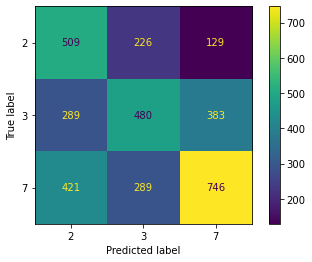

c:\Users\28815\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           2       0.43      0.52      0.47       864
           3       0.51      0.56      0.54      1152
           7       0.60      0.49      0.54      1456

    accuracy                           0.52      3472
   macro avg       0.52      0.52      0.52      3472
weighted avg       0.53      0.52      0.52      3472

Balanced accuracy score:   0.5215826804368472


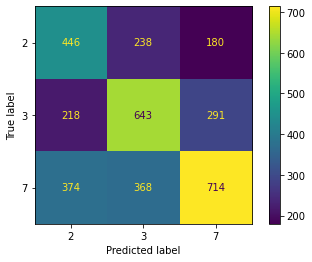

SUBJECT 3
              precision    recall  f1-score   support

           2       0.35      0.22      0.27      1200
           3       0.29      0.30      0.30      1168
           7       0.30      0.41      0.35      1120

    accuracy                           0.31      3488
   macro avg       0.32      0.31      0.31      3488
weighted avg       0.32      0.31      0.30      3488

Balanced accuracy score:   0.31190041313328987


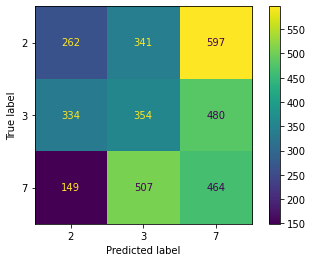

              precision    recall  f1-score   support

           2       0.35      0.41      0.38      1200
           3       0.31      0.29      0.30      1168
           7       0.30      0.27      0.28      1120

    accuracy                           0.33      3488
   macro avg       0.32      0.32      0.32      3488
weighted avg       0.32      0.33      0.32      3488

Balanced accuracy score:   0.32363149597738644


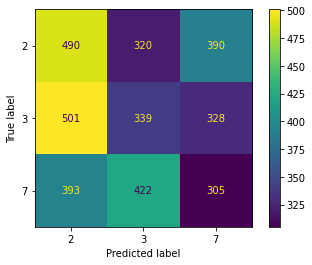

c:\Users\28815\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           2       0.36      0.46      0.41      1200
           3       0.30      0.27      0.29      1168
           7       0.36      0.30      0.33      1120

    accuracy                           0.35      3488
   macro avg       0.34      0.34      0.34      3488
weighted avg       0.34      0.35      0.34      3488

Balanced accuracy score:   0.3435206023048489


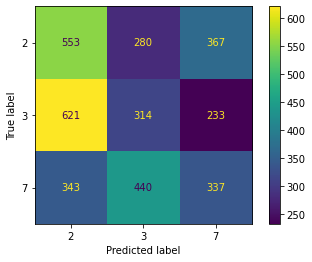

In [34]:
pca_cmp = decomposition.PCA(n_components = 5)
subject1_X_train_PCA = pca_cmp.fit_transform(subject1_X_train)
subject1_X_test_PCA = pca_cmp.fit_transform(subject1_X_test)
subject2_X_train_PCA = pca_cmp.fit_transform(subject2_X_train)
subject2_X_test_PCA = pca_cmp.fit_transform(subject2_X_test)
subject3_X_train_PCA = pca_cmp.fit_transform(subject3_X_train)
subject3_X_test_PCA = pca_cmp.fit_transform(subject3_X_test)

print('SUBJECT 1')
SVM_on_subject(subject1_X_train_PCA, subject1_X_test_PCA, subject1_y_train, subject1_y_test)
KNN_on_subject(subject1_X_train_PCA, subject1_X_test_PCA, subject1_y_train, subject1_y_test)
GNB_on_subject(subject1_X_train_PCA, subject1_X_test_PCA, subject1_y_train, subject1_y_test)
print('SUBJECT 2')
SVM_on_subject(subject2_X_train_PCA, subject2_X_test_PCA, subject2_y_train, subject2_y_test)
KNN_on_subject(subject2_X_train_PCA, subject2_X_test_PCA, subject2_y_train, subject2_y_test)
GNB_on_subject(subject2_X_train_PCA, subject2_X_test_PCA, subject2_y_train, subject2_y_test)
print('SUBJECT 3')
SVM_on_subject(subject3_X_train_PCA, subject3_X_test_PCA, subject3_y_train, subject3_y_test)
KNN_on_subject(subject3_X_train_PCA, subject3_X_test_PCA, subject3_y_train, subject3_y_test)
GNB_on_subject(subject3_X_train_PCA, subject3_X_test_PCA, subject3_y_train, subject3_y_test)

References

Why we regularize: 
https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=b54c5dd03ca2c0b9b17b9fc1d4ebe4c2b6478982 pp. 3-5

Why we pay importance to feature feature selection (filtering data in time & space as well as feature extraction was done already beforehand): 
https://iopscience.iop.org/article/10.1088/1741-2552/aab2f2/meta?casa_token=3cHDiHYYJnsAAAAA:bPx-fZO2e1mhH0_8JiTWa5IeIjxoYGQ532U7hJCFPwPoLZduaWgaQnv5Q5Ev6U9XpturKFd7jV0 chapter 2 

feature selection: 
https://iopscience.iop.org/article/10.1088/1741-2552/aab2f2/meta?casa_token=3cHDiHYYJnsAAAAA:bPx-fZO2e1mhH0_8JiTWa5IeIjxoYGQ532U7hJCFPwPoLZduaWgaQnv5Q5Ev6U9XpturKFd7jV0 chapter 2.2